### **Importing necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

### **Importing churn data**

In [4]:
df = pd.read_csv("/content/drive/MyDrive/dataset/Churn_Modelling.csv") #load dataset

In [5]:
df.head() # showing top 5 rows

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


## **Data understanding/ Preprocessing**



In [6]:
# Check columns missing values
df.isnull().sum()

CustomerId         0
CredRate           0
Geography          0
Gender             4
Age                6
Tenure             0
Balance            0
Prod Number        0
HasCrCard          0
ActMem             0
EstimatedSalary    4
Exited             0
dtype: int64

In [7]:
#drop na values
df.dropna(inplace=True)

In [8]:
# Count unique values of our data
df.nunique()

CustomerId         9986
CredRate            460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6377
Prod Number           4
HasCrCard             2
ActMem                2
EstimatedSalary    9985
Exited                2
dtype: int64

In [9]:
#drop custumer id
df.drop(['CustomerId'],axis=1,inplace=True) #inplace=True changes in actual data

In [10]:
# Check data types for all features
df.dtypes

CredRate             int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
Prod Number          int64
HasCrCard            int64
ActMem               int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [11]:
# Check the dimension of our dataset
df.shape

(9986, 11)

In [12]:
# Describe the all statistical properties of our dataset
df.describe()

,CredRate,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
count,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000
mean,650.564691,38.927799,5.010415,76539.635906,1.530142,0.705588,0.515121,100084.539598,0.203885
std,96.604678,10.491053,2.891614,62391.288935,0.581765,0.455801,0.499796,57511.969095,0.402905
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,652.000000,37.000000,5.000000,97262.675000,1.000000,1.000000,1.000000,100193.915000,0.000000
75%,717.750000,44.000000,7.000000,127653.825000,2.000000,1.000000,1.000000,149395.882500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [13]:
y_bar=df['Exited'].value_counts()
y_bar
list(y_bar.index)

[0, 1]

In [14]:
df['Exited'].unique()

array([1, 0])

0    7950
1    2036
Name: Exited, dtype: int64

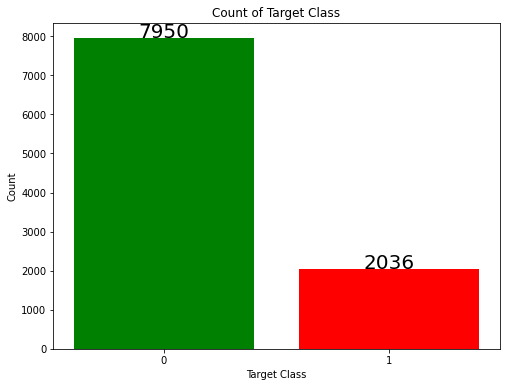

In [15]:
# counting target values
rcParams['figure.figsize'] = 8,6 #setting size of figure
y_bar=df['Exited'].value_counts()
plt.bar(y_bar.index, y_bar, color = ['green', 'red'])
plt.xticks([1, 0])
#add text in figure
plt.text(0,y_bar[0]+20, str(y_bar[0]),fontsize=20,horizontalalignment='center')
plt.text(1,y_bar[1]+20, str(y_bar[1]),fontsize=20,horizontalalignment='center')

plt.xlabel('Target Class')
plt.ylabel('Count')
plt.title('Count of Target Class')
y_bar

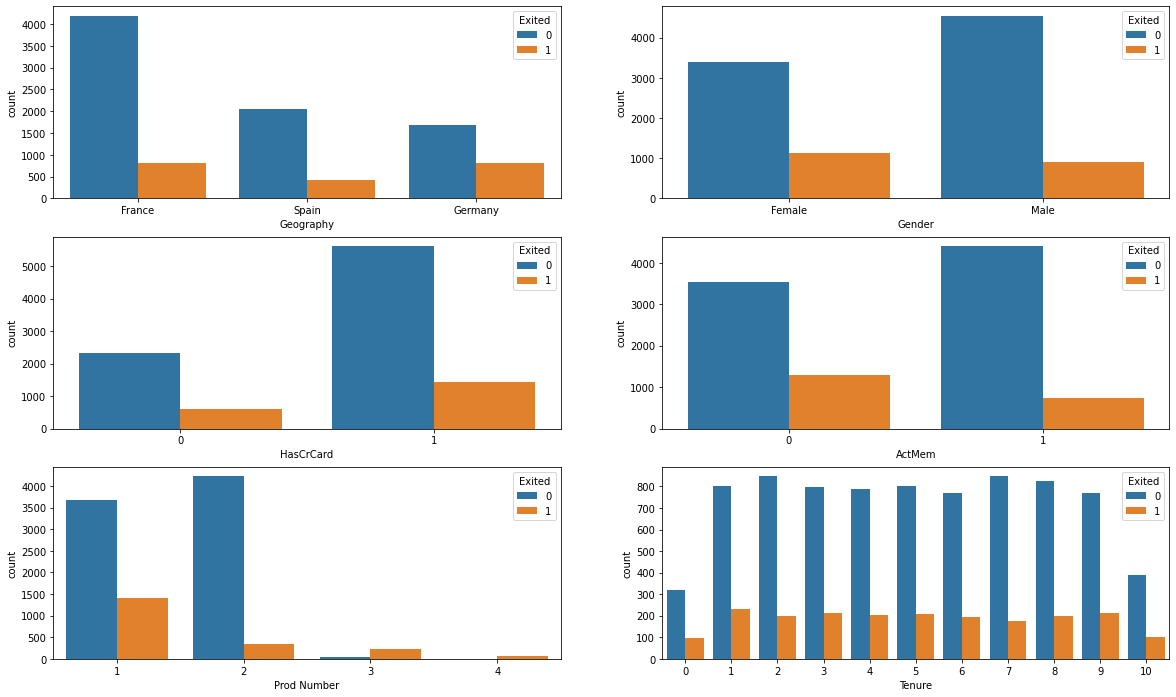

In [16]:
#seaborn plot for discreate values
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='ActMem', hue = 'Exited',data = df, ax=axarr[1][1])
sns.countplot(x='Prod Number', hue = 'Exited',data = df, ax=axarr[2][0])
sns.countplot(x='Tenure', hue = 'Exited',data = df, ax=axarr[2][1])

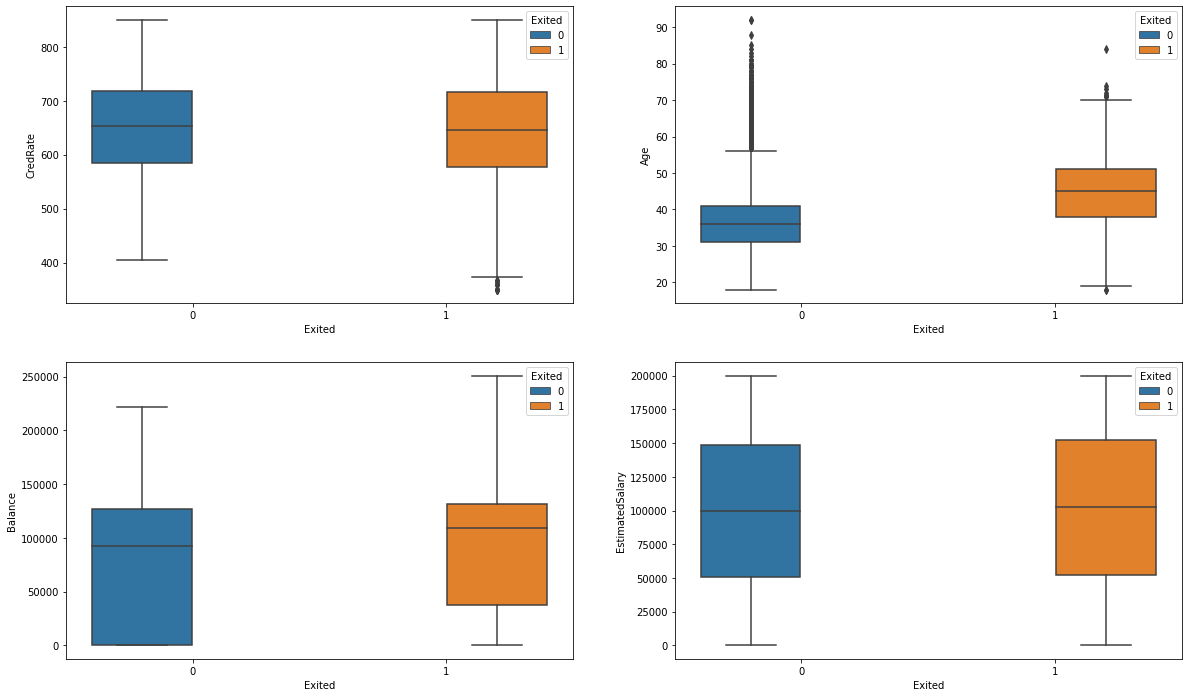

In [17]:
    # Relations based on the continuous data attributes
    fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
    sns.boxplot(y='CredRate',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
    sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
    sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
    sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])

### **Encode string features**

In [18]:
#print data types
df.dtypes

CredRate             int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
Prod Number          int64
HasCrCard            int64
ActMem               int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [19]:
# convert objects to str
df['Geography'] = df['Geography'].astype(str)
df['Gender'] = df['Gender'].astype(str)

In [20]:
#encoding labels
le_geography    = preprocessing.LabelEncoder()
le_gender  = preprocessing.LabelEncoder()

le_geography.fit(df['Geography'])
le_gender.fit(df['Gender'])

df['Geography'] = le_geography.transform(df['Geography'])
df['Gender'] = le_gender.transform(df['Gender'])

In [21]:
#visualize top 10 values
df.head(10)

,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,619,0,0,42.0,2,0.00,1,1,1,101348.88,1
1,608,2,0,41.0,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42.0,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39.0,1,0.00,2,0,0,93826.63,0
4,850,2,0,43.0,2,125510.82,1,1,1,79084.10,0
5,645,2,1,44.0,8,113755.78,2,1,0,149756.71,1
7,376,1,0,29.0,4,115046.74,4,1,0,119346.88,1
8,501,0,1,44.0,4,142051.07,2,0,1,74940.50,0
9,684,0,1,27.0,2,134603.88,1,1,1,71725.73,0
13,549,0,0,25.0,5,0.00,2,0,0,190857.79,0


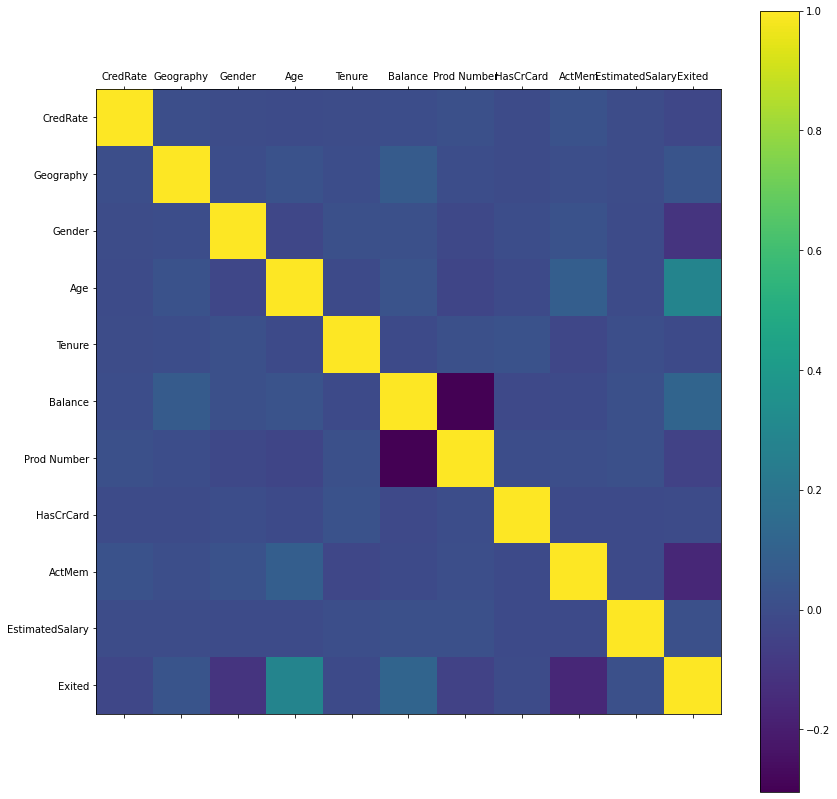

In [22]:
#ploting corealtion table
rcParams['figure.figsize'] = 20, 14
plt.matshow(df.corr())
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns)
plt.colorbar()

# **Machine learning model training:**

In [23]:
# seprate data into X and Y
X = df.drop('Exited', axis=1)
Y = df['Exited']

In [24]:
#normalizing data
XN=preprocessing.scale(X)
XN=pd.DataFrame(XN,columns=X.columns)
XN

,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary
0,-0.326757,-0.902025,-1.095244,0.292855,-1.041137,-1.226829,-0.911311,0.645955,0.970201,0.021985
1,-0.440629,1.515156,-1.095244,0.197531,-1.386981,0.116500,-0.911311,-1.548095,0.970201,0.216627
2,-1.537939,-0.902025,-1.095244,0.292855,1.033933,1.332323,2.526676,0.645955,-1.030714,0.240780
3,0.501402,-0.902025,-1.095244,0.006883,-1.386981,-1.226829,0.807683,-1.548095,-1.030714,-0.108816
4,2.064551,1.515156,-1.095244,0.388179,-1.041137,0.784943,-0.911311,0.645955,0.970201,-0.365167
...,...,...,...,...,...,...,...,...,...,...
9981,1.246744,-0.902025,0.913039,0.006883,-0.003602,-1.226829,0.807683,0.645955,-1.030714,-0.066318
9982,-1.393012,-0.902025,0.913039,-0.374414,1.725623,-0.307270,-0.911311,0.645955,0.970201,0.028087
9983,0.604921,-0.902025,-1.095244,-0.279090,0.688088,-1.226829,-0.911311,-1.548095,0.970201,-1.008518
9984,1.257096,0.306565,0.913039,0.292855,-0.695292,-0.023471,0.807683,0.645955,-1.030714,-0.125128


In [25]:
X=XN

In [26]:
#split data into train and test variable 
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,Y, test_size=0.3) #30% Data for test and 70% for train

In [27]:
#initializing lists to store data
ModelName=[]
TestAccuracy=[]
TrainAccuracy=[]
PredictedResult=[]
ConfusionMatrix=[]
Probes=[]
models=[]

In [28]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#create pipelines
pipelines = []
pipelines.append(LogisticRegression())
pipelines.append(RandomForestClassifier(n_estimators=100))
pipelines.append(DecisionTreeClassifier())
pipelines.append(KNeighborsClassifier(n_neighbors=5))
pipelines.append(GaussianNB())
names = ["Logistic Regression",'Random Forest','Decision Tree','KNN',"Nive Bias"]
i=0
for model in pipelines:
    kfold = KFold(n_splits=10, random_state=21,shuffle=True)
    cv_results = cross_val_score(model, train_x, train_y, cv=kfold, scoring='accuracy')

    ModelName.append(names[i]) #append model name in list
    model.fit(train_x, train_y) #train model
    y_predicted = model.predict(test_x) #predict results
    PredictedResult.append(list(y_predicted)) #append results in list
    train_Acc = model.score(train_x, train_y) # calculate training accuracy
    print('train accuracy for ',names[i],'=',train_Acc) #print traning accuracy
    TrainAccuracy.append(train_Acc) #append train accuracy in list
    test_Acc = cross_val_score(model, train_x, train_y, cv=kfold, scoring='accuracy') # calculate test accuracy
    TestAccuracy.append(test_Acc.mean()) # apppend accuracy value in list
    print('Mean of K-fold test accuracy for ',names[i],'=',test_Acc.mean()) #print test accuracy 
    print('\n') 
    ConfusionMatrix.append(confusion_matrix(test_y,y_predicted)) # store confussion matrix in list
    Probes.append(model.predict_proba(test_x))
    models.append(model)
    i+=1

train accuracy for  Logistic Regression = 0.8047210300429185
Mean of K-fold test accuracy for  Logistic Regression = 0.8042918454935624


train accuracy for  Random Forest = 0.999856938483548
Mean of K-fold test accuracy for  Random Forest = 0.8572246065808298


train accuracy for  Decision Tree = 1.0
Mean of K-fold test accuracy for  Decision Tree = 0.7872675250357654


train accuracy for  KNN = 0.8732474964234621
Mean of K-fold test accuracy for  KNN = 0.8258941344778256


train accuracy for  Nive Bias = 0.8258941344778254
Mean of K-fold test accuracy for  Nive Bias = 0.8254649499284692




## **Evaluation/Results:**

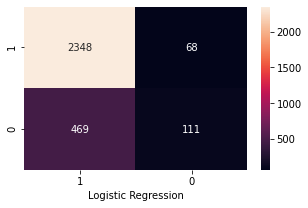

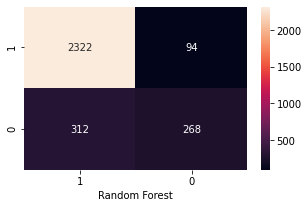

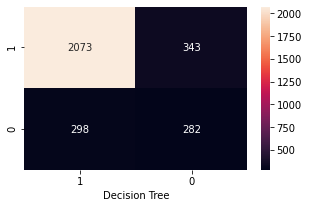

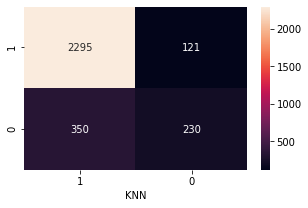

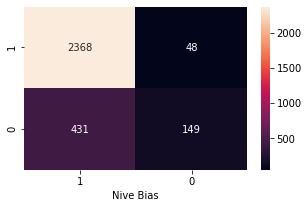

In [38]:
#plot confussion matrix
for i in range(len(ModelName)): #loop on lenth of list modelName
  df_cm = pd.DataFrame(ConfusionMatrix[i], index = ['1','0'],columns = ['1','0']) #make dataframe of confusion matrix array
  plt.figure(figsize = (5,3)) #initialize figure size
  sns.heatmap(df_cm, annot=True, fmt='g') #plot heatmap
  plt.xlabel(ModelName[i]) #set label

In [39]:
#initializing list
Sensitivity=[]
Specificity=[]
Precision=[]

for i in range(len(ModelName)):
  TP=ConfusionMatrix[i][0][0] #get TP from ConfusionMatrix
  TN=ConfusionMatrix[i][0][1] #get TN from ConfusionMatrix
  FP=ConfusionMatrix[i][1][1] #get FP from ConfusionMatrix
  FN=ConfusionMatrix[i][1][0] #get FN from ConfusionMatrix
  # Sensitivity, hit rate, recall, or true positive rate
  TPR = TP/(TP+FN) # Calculate true positive rate
  Sensitivity.append(TPR)
  # Specificity or true negative rate
  TNR = TN/(TN+FP) # Calculate true negative rate
  Specificity.append(TNR)
  # Precision or positive predictive value
  PPV = TP/(TP+FP) # Calculate positive predictive rate
  Precision.append(PPV)

Text(0, 0.5, 'Sensitivity Vlaues')

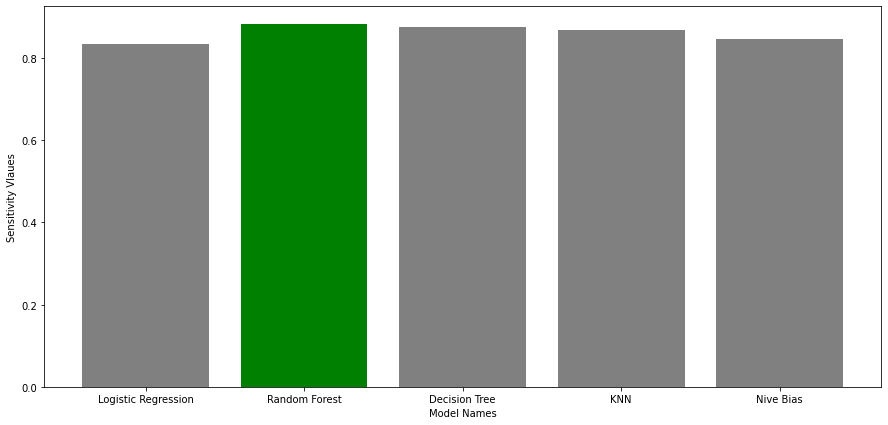

In [40]:
rcParams['figure.figsize'] = 15,7 # initialize figure size
# make list of colors with condition if value is higher add green color other wise add gray color
clrs = ['grey' if (x < max(Sensitivity)) else 'green' for x in Sensitivity] 
plt.bar(ModelName,Sensitivity,color=clrs) #plot bar graph
plt.xticks(ModelName) #set x ticks
plt.xlabel('Model Names') #set x label
plt.ylabel('Sensitivity Vlaues') #set y label

its graphical compression of sensitivity for all models. The random forest has higher sensitivity than others.

Text(0, 0.5, 'Specificity Vlaues')

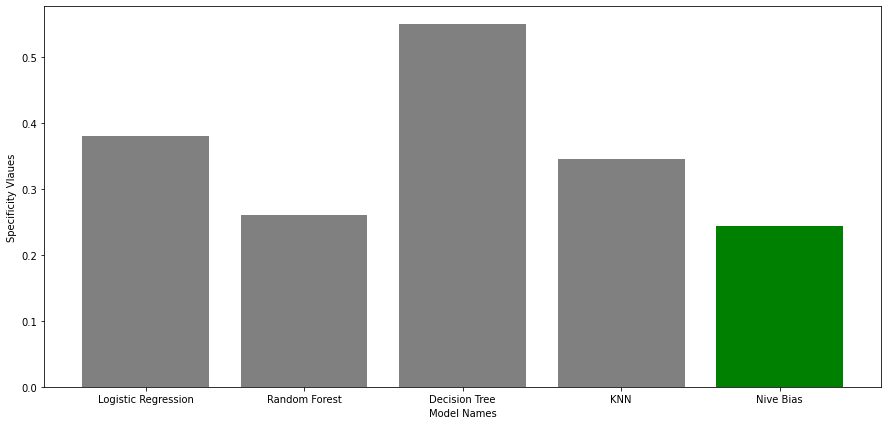

In [41]:
rcParams['figure.figsize'] = 15,7 # initialize figure size
# make list of colors with condition if value is lowest add green color other wise add gray color
clrs = ['grey' if (x > min(Specificity)) else 'green' for x in Specificity ]
plt.bar(ModelName,Specificity,color=clrs) #plot bar graph
plt.xticks(ModelName) #set x ticks
plt.xlabel('Model Names') #set x label
plt.ylabel('Specificity Vlaues') #set y label

Text(0, 0.5, 'Precision Vlaues')

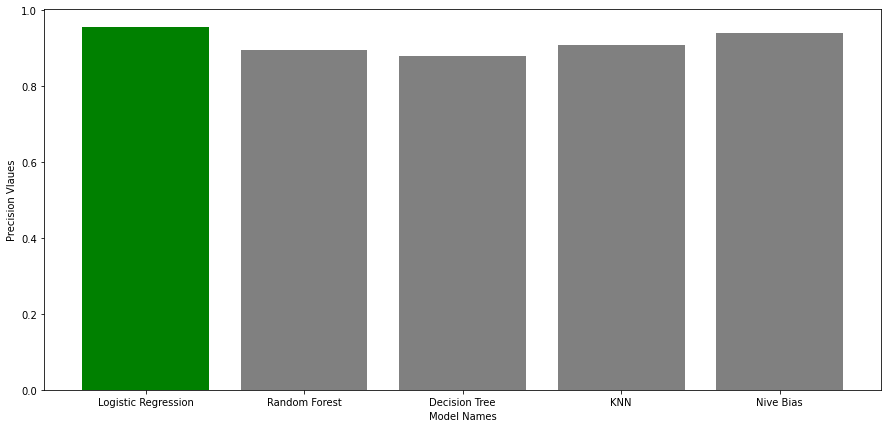

In [42]:
rcParams['figure.figsize'] = 15,7 # initialize figure size
# make list of colors with condition if value is higher add green color other wise add gray color
clrs = ['grey' if (x < max(Precision)) else 'green' for x in Precision ] 
plt.bar(ModelName,Precision,color=clrs) #plot bar graph
plt.xticks(ModelName)  #set x ticks
plt.xlabel('Model Names') #set x label
plt.ylabel('Precision Vlaues') #set y label

Text(0, 0.5, 'Train Accuracy Vlaues')

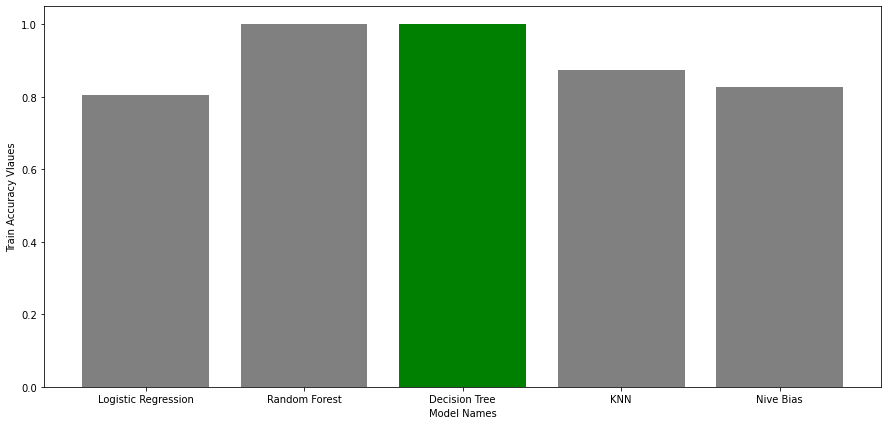

In [45]:
rcParams['figure.figsize'] = 15,7 # initialize figure size
# make list of colors with condition if value is higher add green color other wise add gray color
clrs = ['grey' if (x < max(TrainAccuracy)) else 'green' for x in TrainAccuracy ]
plt.bar(ModelName,TrainAccuracy,color=clrs) #plot bar graph
plt.xticks(ModelName) #set x ticks
plt.xlabel('Model Names')#set x label
plt.ylabel('Train Accuracy Vlaues') #set y label

Text(0, 0.5, 'Test Accuracy Vlaues')

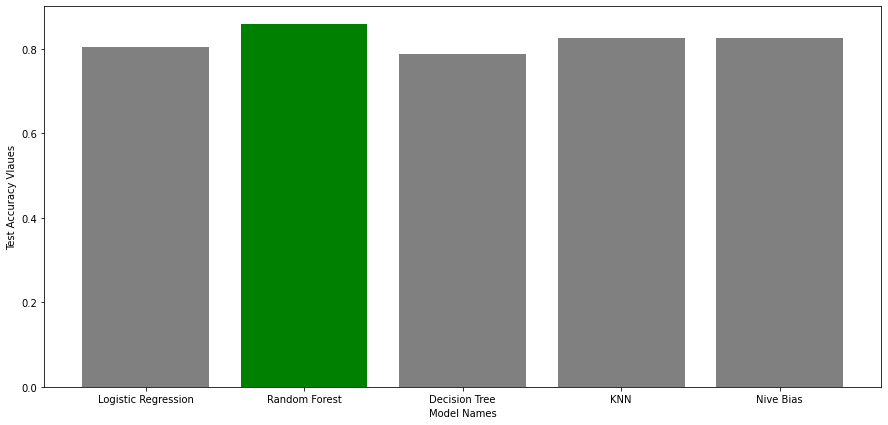

In [46]:
rcParams['figure.figsize'] = 15,7 # initialize figure size
# make list of colors with condition if value is higher add green color other wise add gray color
clrs = ['grey' if (x < max(TestAccuracy)) else 'green' for x in TestAccuracy]
plt.bar(ModelName,TestAccuracy,color=clrs) #plot bar graph
plt.xticks(ModelName) #set x ticks
plt.xlabel('Model Names') #set x label
plt.ylabel('Test Accuracy Vlaues') #set y label

Logistic Regression : ROC AUC=0.582


Random Forest : ROC AUC=0.712


Decision Tree : ROC AUC=0.672


KNN : ROC AUC=0.673


Nive Bias : ROC AUC=0.619




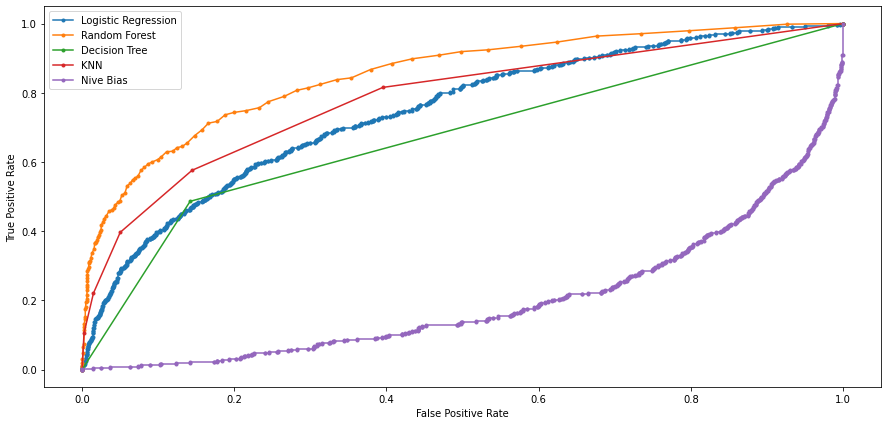

In [48]:
AUC=[] #ilitialize AUC list
#import libraries
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
for i in range(len(ModelName)):#loop model name list length
  #condition to seprate target value and features
  if i==len(ModelName)-1:
    lr_probs = Probes[i][:, 0]
  else:
    lr_probs = Probes[i][:, 1]
  lr_auc = roc_auc_score(test_y, PredictedResult[i]) #get AUC score
  print(ModelName[i],': ROC AUC=%.3f' % (lr_auc)) #print AUC values
  AUC.append(lr_auc) #append AUC in list
  print('\n')
  lr_fpr, lr_tpr, _ = roc_curve(test_y, lr_probs) #get false positive and true negative values
  plt.plot(lr_fpr, lr_tpr, marker='.', label=ModelName[i]) #plot curve
plt.xlabel('False Positive Rate') #set xlabel
plt.ylabel('True Positive Rate') #set y label
plt.legend() #add legend
plt.show()

In [49]:
import pandas as pd
data = {'Senstivity':Sensitivity,'Specificty':Specificity,'Precision':Precision,'Train Accuracy':TrainAccuracy,'Test Accuracy':TestAccuracy,'AUC':AUC}
df1 = pd.DataFrame(data, index=ModelName)
df1

,Senstivity,Specificty,Precision,Train Accuracy,Test Accuracy,AUC
Logistic Regression,0.833511,0.379888,0.954860,0.804721,0.804292,0.581617
Random Forest,0.881549,0.259669,0.896525,0.999857,0.857225,0.711581
Decision Tree,0.874315,0.548800,0.880255,1.000000,0.787268,0.672118
KNN,0.867675,0.344729,0.908911,0.873247,0.825894,0.673234
Nive Bias,0.846016,0.243655,0.940803,0.825894,0.825465,0.618515
